# $T_2$ Ramsey Experiment

This experiment serves as one of the series of experiments used to characterize a single qubit. Its purpose is to determine two of the qubit's properties: *detuning frequency* and *$T_2*$*. The rough frequency of the qubit was already determined previously. Here, we would like to measure the *detuning*, that is  the difference between the qubit's precise frequency and the frequency of the rotation pulses (based on the rough frequency). This part of the experiment is also called a *Ramsey Experiment*. $T_2*$ represents the rate of decay toward a mixed state, when the qubits is initiated to the |+⟩ state.

In [1]:
import qiskit
from qiskit_experiments.characterization import T2StarExperiment

The circuit used for the experiment comprises the following:

    1. Hadamard gate
    2. delay
    3. p gate that rotates the qubit in the x-y plane 
    4. Hadamard gate
    5. measurement

During the delay time, we expect the qubit to precess about the z-axis. If the p gate and the precession offset each other perfectly, then the qubit will arrive at the |1⟩ state (after the second Hadamard gate). By varying the extension of the delays, we get a series of oscillations of the qubit state between the |0⟩ and |1⟩ states. We can draw the graph of the resulting function, and can analytically extract the desired values.

In [2]:
# set the computation units to seconds
unit = 's' #seconds
qubit = 0
# set the desired delays
delays = list(range(1,50))


In [3]:
# Create a T2* experiment. Print the first circuit as an example
exp1 = T2StarExperiment(qubit, delays, unit=unit)
print(exp1.circuits()[0])

     ┌───┐┌─────────────┐┌──────┐ ░ ┌───┐ ░ ┌─┐
q_0: ┤ H ├┤ DELAY(1[s]) ├┤ P(0) ├─░─┤ H ├─░─┤M├
     └───┘└─────────────┘└──────┘ ░ └───┘ ░ └╥┘
c: 1/════════════════════════════════════════╩═
                                             0 


We run the experiment on a simple, simulated backend, created specifically for this experiment.

In [4]:
from qiskit_experiments.test.t2ramsey_backend import T2StarBackend
# MockJob is a wrapper for the backend, to give it the form of a job
from qiskit_experiments.test.mock_job import MockJob
import qiskit_experiments.matplotlib
from qiskit_experiments.matplotlib import pyplot, requires_matplotlib
from qiskit_experiments.matplotlib import HAS_MATPLOTLIB

# The behavior of the backend is determined by the following parameters
backend = T2StarBackend(
                    p0={"a_guess":[0.5], "t2star":[10.0], "f_guess":[0.1], "phi_guess":[0.0],
                        "b_guess": [0.5]},
                    initial_prob_plus=[0.0],
                    readout0to1=[0.02],
                    readout1to0=[0.02],
                    dt_factor=1,
                )


The resulting graph will have the form:
$ f(t) = a^{-x/T_2*} \cdot cos(2 \pi f t + \phi) + b $
where *t* is the delay, $T_2*$ is the decay factor, and *f* is the detuning frequency.
`dt_factor` is a scaling factor that depends on the STI units used. It is `1` here, because the unit is seconds.

In [5]:
exp1.set_analysis_options(user_p0=None)
expdata1 = exp1.run(backend=backend, shots=2000)
print(expdata1)

---------------------------------------------------
Experiment: T2StarExperiment
Experiment ID: 2dd168f2-18aa-4bf7-a205-61b2ae1c8f93
Status: DONE
Circuits: 49
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- t2star_value: 10.150626816610623
- frequency_value: 0.1001533153583983
- stderr: 0.3062299835858502
- unit: s
- label: T2*
- fit: 
- reduced_chisq: 1.0806450581758393
- dof: 44
- xrange: [1.0, 49.0]
- circuit_unit: s
- quality: computer_good
- success: True


---------------------------------------------------
Experiment: T2StarExperiment
Experiment ID: d655f7ec-bcf1-4e8f-a367-cb4199101fc3
Status: DONE
Circuits: 49
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- t2star_value: 9.76754192531481
- frequency_value: 0.099597344037479
- stderr: 0.2943964791452717
- unit: s
- label: T2*
- fit: 
- reduced_chisq: 1.136752469342798
- dof: 44
- xrange: [1.0, 49.0]
- circuit_unit: s
- quality: computer_good
- success: True


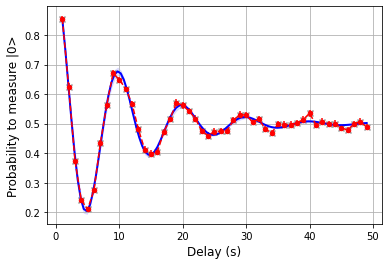

In [6]:
# The user can provide initial estimates for the parameters to help the analysis process
user_p0={
    "A": 0.5,
    "t2star": 11.0,
    "f": 0.15,
    "phi": 0,
    "B": 0.5
        }
exp_with_p0 = T2StarExperiment(qubit, delays, unit=unit)
exp_with_p0.set_analysis_options(user_p0=user_p0, plot=True)
expdata_with_p0 = exp_with_p0.run(backend=backend, shots=2000)
print(expdata_with_p0)

The units can be changed, but the output in the result is always given in seconds. The units in the backend must be adjusted accordingly.

In [7]:
from qiskit.utils import apply_prefix
unit = 'ns'
dt_factor = apply_prefix(1, unit)
print(dt_factor)

1e-09


---------------------------------------------------
Experiment: T2StarExperiment
Experiment ID: f28d9698-23ca-4418-a518-fef619a2da3a
Status: DONE
Circuits: 49
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- t2star_value: 1.2069409793530161e-08
- frequency_value: 79919326.16631024
- stderr: 3.7242261779804297e-10
- unit: s
- label: T2*
- fit: 
- reduced_chisq: 1.0205137406284606
- dof: 44
- xrange: [1e-09, 4.9e-08]
- circuit_unit: ns
- quality: computer_good
- success: True


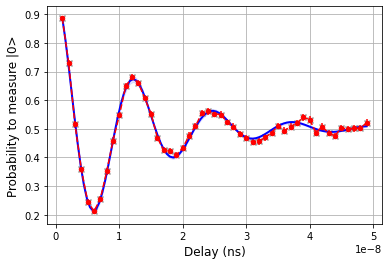

In [8]:
backend_in_ns = T2StarBackend(
                    p0={"a_guess":[0.5], "t2star":[12.0], "f_guess":[0.08], "phi_guess":[0.0],
                        "b_guess": [0.5]},
                    initial_prob_plus=[0.0],
                    readout0to1=[0.02],
                    readout1to0=[0.02],
                    dt_factor=dt_factor
                )
exp_in_ns = T2StarExperiment(qubit, delays, unit=unit)
exp_in_ns.set_analysis_options(user_p0=None, plot=True)
expdata_in_ns = exp_in_ns.run(backend=backend_in_ns, shots=2000)
print(expdata_in_ns)

It is possible to add data to an experiment, after the analysis of the first set of data. In the next example we add exp2 to `exp_in_ns` that we showed above.

In [9]:
import numpy as np

more_delays = np.linspace(0.5, 49.5, num=50)
                
exp2 = T2StarExperiment(qubit, more_delays, unit=unit)
exp2.set_analysis_options(user_p0=None)
expdata2 = exp2.run(
            backend=backend_in_ns,
            experiment_data=expdata_in_ns,
            shots=2000
        )
result2 = expdata2.analysis_result(0)
print(result2)

QiskitError: 'Existing ExperimentData contains data from a different experiment.'